In [229]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [230]:
df1 = pd.read_csv("/kaggle/input/dsai-omah-ti-open-recruitment-2025-2026/airbnb.csv")
df_target = pd.read_csv("/kaggle/input/dsai-omah-ti-open-recruitment-2025-2026/train.csv")
df_test1 = pd.read_csv("/kaggle/input/dsai-omah-ti-open-recruitment-2025-2026/test.csv")
#train data
df = pd.merge(df1, df_target, how='inner', on=['id', 'id'])
#test data
df_test = pd.merge(df1, df_test1, how='inner', on=['id', 'id'])

df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,name,description,neighborhood_overview,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,...,latitude,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,availability_30,availability_60,availability_90,availability_365,price
0,71896,B&B Room 1 near Airport & EXPO,NaN,NaN,Private room in home,Private room,1,Shared half-bath,1.0,1.0,...,1.34754,92.0,92.0,1125.0,1125.0,30,60,90,90,104.000000
1,71903,Room 2-near Airport & EXPO,"Like your own home, 24hrs access.",Quiet and view of the playground with exercise...,Private room in home,Private room,2,Shared half-bath,1.0,2.0,...,1.34531,92.0,92.0,1125.0,1125.0,30,60,90,90,76.000000
2,275343,10min walk to MRT & a Cozy Room with window! (1),**IMPORTANT NOTES: READ BEFORE YOU BOOK! <br ...,NaN,Private room in rental unit,Private room,1,2 shared baths,NaN,NaN,...,1.29015,180.0,180.0,1125.0,1125.0,0,0,0,0,33.724354
3,275344,15 mins to Outram MRT Single Room (2),Lovely home for the special guest !,Bus stop <br />Food center <br />Supermarket,Private room in rental unit,Private room,1,2.5 shared baths,NaN,NaN,...,1.28836,180.0,180.0,1125.0,1125.0,0,0,0,0,39.421917
4,324945,Comfortable Room w/study area @ Redhill MRT! (6),**IMPORTANT NOTES: READ BEFORE YOU BOOK! <br ...,NaN,Private room in rental unit,Private room,1,2 shared baths,NaN,NaN,...,1.28828,180.0,180.0,1125.0,1125.0,0,0,0,0,45.717426


# EDA

**Columns Description**

In [231]:
output = []

for col in df.columns:

    Null  = pd.isna(df[col]).sum()
    unique = df[col].nunique()
    colType = str(df[col].dtype)

    output.append([col, Null, unique, colType])

output = pd.DataFrame(output)   
output.columns = ['colName','null values', 'unique', 'dtype']
output

,colName,null values,unique,dtype
0,id,0,2954,int64
1,name,0,2827,object
2,description,55,2080,object
3,neighborhood_overview,1590,651,object
4,property_type,0,43,object
5,room_type,0,4,object
6,accommodates,0,14,int64
7,bathrooms_text,6,37,object
8,bedrooms,243,9,float64
9,beds,690,15,float64


**Check Duplicated**

In [232]:
df.duplicated().sum()

0

**Statistical Analysis**

In [233]:
df.describe()

,id,accommodates,bedrooms,beds,minimum_nights,maximum_nights,longitude,latitude,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,availability_30,availability_60,availability_90,availability_365,price
count,2.954000e+03,2954.000000,2711.000000,2264.000000,2954.000000,2954.000000,2954.000000,2954.000000,2953.000000,2953.000000,2953.000000,2953.000000,2954.000000,2954.000000,2954.000000,2954.000000,2954.000000
mean,6.192201e+17,2.638795,1.237182,1.589664,61.047393,624.580230,103.844183,1.309825,58.440569,59.371148,688.789367,749.093464,19.071767,41.656060,64.995261,248.428233,361.547223
std,6.044228e+17,1.722896,0.768977,1.299546,55.754588,407.081999,0.043163,0.030919,56.331096,55.993301,745.615471,720.308321,11.441111,23.176443,34.149142,134.572377,764.335605
min,7.189600e+04,1.000000,0.000000,0.000000,1.000000,7.000000,103.648280,1.222720,1.000000,1.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,-248.748230
25%,3.435329e+07,2.000000,1.000000,1.000000,2.000000,365.000000,103.833880,1.291902,1.000000,3.000000,365.000000,365.000000,9.000000,28.000000,53.000000,120.000000,100.000000
50%,6.752423e+17,2.000000,1.000000,1.000000,92.000000,365.000000,103.843999,1.304310,92.000000,92.000000,365.000000,731.000000,23.000000,53.000000,83.000000,327.000000,232.000000
75%,1.245038e+18,3.000000,1.000000,2.000000,92.000000,1125.000000,103.860173,1.316936,92.000000,92.000000,1125.000000,1125.000000,29.000000,59.000000,89.000000,362.000000,405.788150
max,1.518509e+18,16.000000,8.000000,22.000000,700.000000,9001.000000,103.985176,1.457802,700.000000,700.000000,9999.000000,9999.000000,30.000000,60.000000,90.000000,365.000000,13000.000000


**Check Outliers**

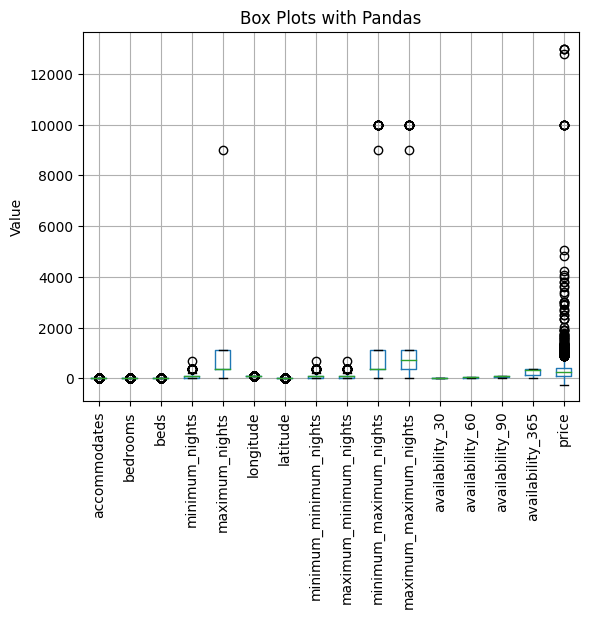

In [234]:
df.drop('id', axis=1).boxplot(rot=90)
plt.title("Box Plots with Pandas")
plt.ylabel("Value")
plt.show()

In [235]:
num_df = df.select_dtypes(include= ['float64', 'int64'])

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'accommodates'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'maximum_nights'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'minimum_minimum_nights'}>],
       [<Axes: title={'center': 'maximum_minimum_nights'}>,
        <Axes: title={'center': 'minimum_maximum_nights'}>,
        <Axes: title={'center': 'maximum_maximum_nights'}>],
       [<Axes: title={'center': 'availability_30'}>,
        <Axes: title={'center': 'availability_60'}>,
        <Axes: title={'center': 'availability_90'}>],
       [<Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

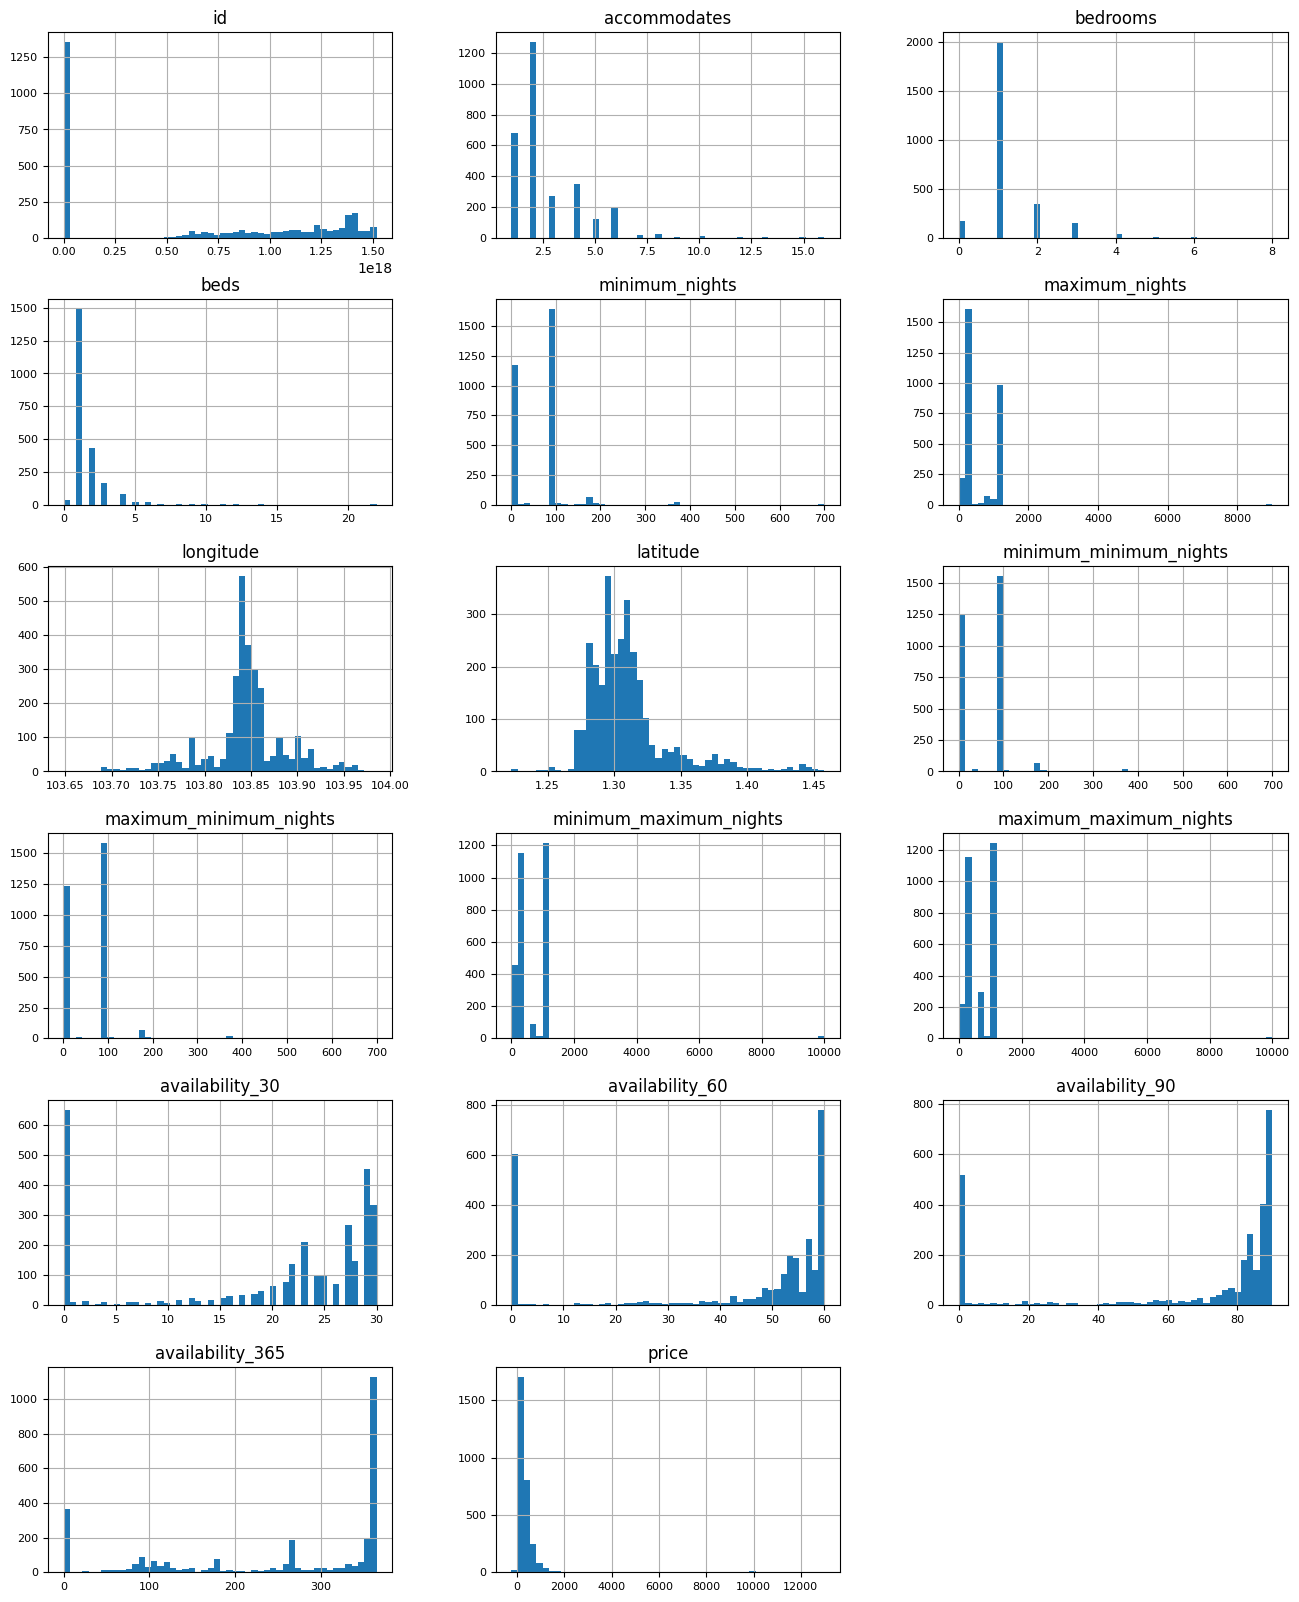

In [236]:
num_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8, layout=(6, 3))

**Correlation**

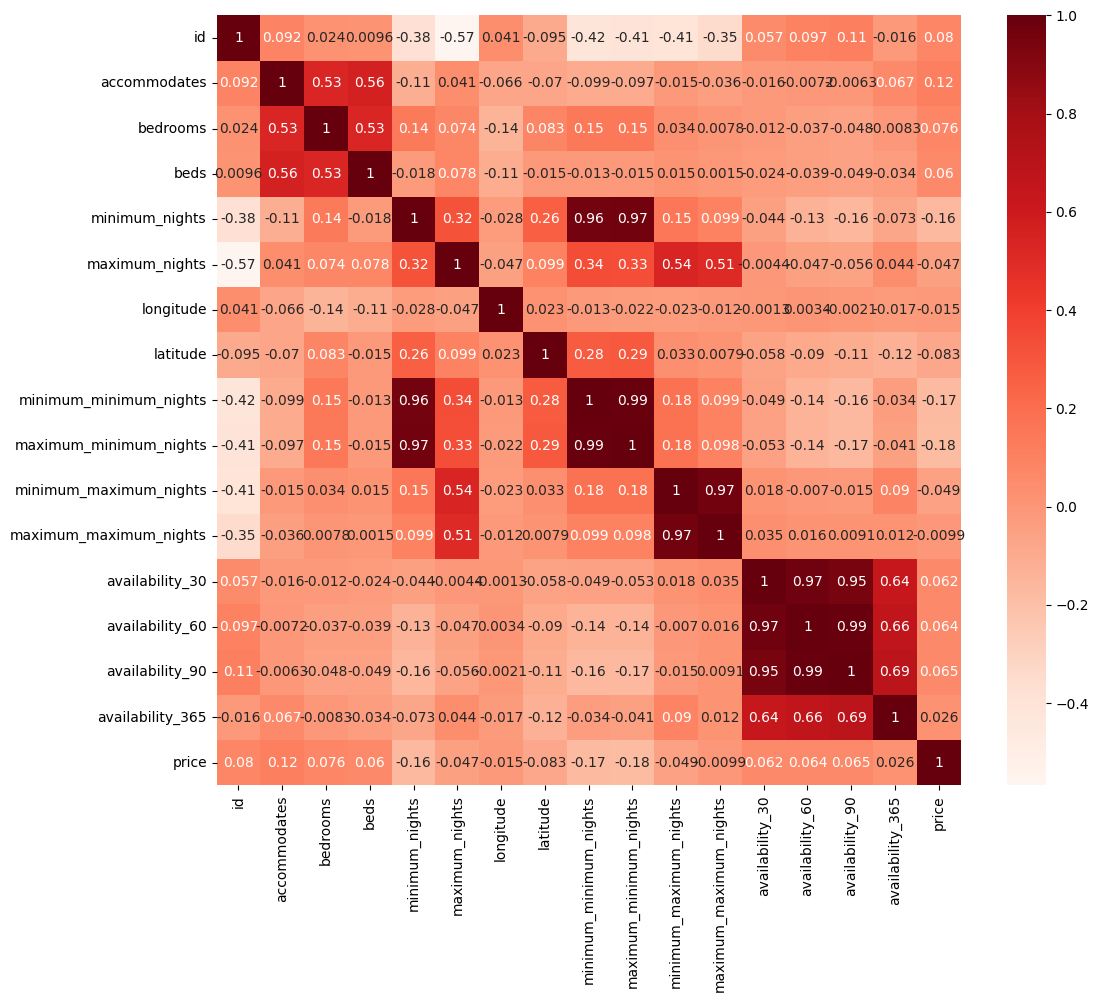

In [237]:
plt.figure(figsize=(12,10))
cor = num_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Pre-Processing

**Feature Selection**

drop unimportant features

In [238]:
df = df.drop(columns=["name", "description", "neighborhood_overview", "property_type", "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "amenities", "bathrooms_text"])

In [239]:
df_test = df_test.drop(columns=["name", "description", "neighborhood_overview", "property_type", "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "amenities", "bathrooms_text"])

**Handling Missing Values**

To handle missing values, I used imputation method, impute mean for numerical column and mode for categorical column because we can't drop a column for submission

In [240]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [241]:
test_num_cols = df_test.select_dtypes(include=['int64','float64']).columns
test_cat_cols = df_test.select_dtypes(include=['object']).columns

df_test[test_num_cols] = df_test[test_num_cols].fillna(df_test[test_num_cols].mean())
df_test[test_cat_cols] = df_test[test_cat_cols].fillna(df_test[test_cat_cols].mode().iloc[0])

**Handle Outliers**

In the beginning I tried to handle outlier by dropping the column that contains outlier using IQR but we can't drop a single column for submission so i decided to used capping method

In [242]:
"""
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    df = remove_outliers_iqr(df, col)

df.drop('id', axis=1).boxplot(rot=90)
plt.title("Box Plots with Pandas")
plt.ylabel("Value")
plt.show()
"""

'\ndef remove_outliers_iqr(df, column):\n    Q1 = df[column].quantile(0.25)\n    Q3 = df[column].quantile(0.75)\n    IQR = Q3 - Q1\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]\n    return df_filtered\n\nnum_cols = df.select_dtypes(include=np.number).columns\nfor col in num_cols:\n    df = remove_outliers_iqr(df, col)\n\ndf.drop(\'id\', axis=1).boxplot(rot=90)\nplt.title("Box Plots with Pandas")\nplt.ylabel("Value")\nplt.show()\n'

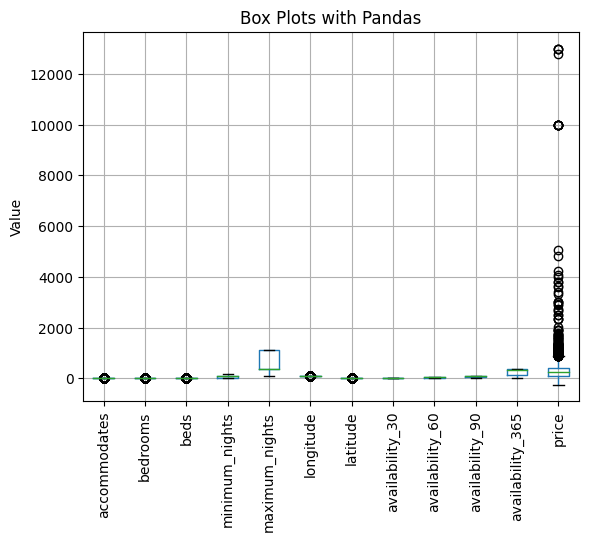

In [243]:
# remove columns that shouldn't be capped
num_cols = [c for c in num_cols if c not in ["id", "price"]]

# compute train quantiles
q01 = df[num_cols].quantile(0.01)
q99 = df[num_cols].quantile(0.99)

# apply capping on TRAIN
df[num_cols] = df[num_cols].clip(lower=q01, upper=q99, axis=1)

df.drop('id', axis=1).boxplot(rot=90)
plt.title("Box Plots with Pandas")
plt.ylabel("Value")
plt.show()

In [244]:
test_num_cols = [c for c in test_num_cols if c not in ["id"]]

df_test[test_num_cols] = df_test[test_num_cols].clip(lower=q01, upper=q99, axis=1)

**Encoding**

One-hot encoding for room_type because if using label encoder as a discrete value so the model will not misunderstood it as a continous values

In [245]:
df = pd.get_dummies(df, columns=['room_type'])

In [246]:
df_test = pd.get_dummies(df_test, columns=['room_type'])

Label encoding for instant_bookable because it just have two values 

In [247]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["instant_bookable"] = le.fit_transform(df["instant_bookable"])

In [248]:
df_test["instant_bookable"] = le.fit_transform(df_test["instant_bookable"])

drop rows with negative price because price can't be negative

In [249]:
rows_with_negatives = df[(df < 0).any(axis=1)]
df.drop(index=rows_with_negatives.index, inplace=True)

# Modelling & Evaluation

i decided to use log transformation on the "price" target because it is very skewed

In [250]:
X = df.drop(columns=["id", "price"], axis=1)
y = np.log1p(df['price'])

using robust scaler because it can handle outlier better than standard scaler

In [251]:
"""
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
"""

'\nfrom sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\nX = scaler.fit_transform(X)\n'

In [252]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X = scaler.fit_transform(X)

function to calculate MAPE

In [253]:
def calculate_mape(y_true, y_pred):
    percentage_errors = np.abs((y_true - y_pred) / y_true)
    mape = np.mean(percentage_errors) * 100
    return mape

In [254]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define only the models you want
models = {
    "Random Forest": RandomForestRegressor(
        n_estimators=200,
        random_state=42
    ),

    "XGBoost": XGBRegressor(
        n_estimators=700,
        learning_rate=0.05,
        max_depth=8,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='reg:squarederror',
        random_state=42
    )
}

print("Regression Model Performance:")

for name, model in models.items():
    print(f"\nTraining {name}:")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = calculate_mape(y_test, y_pred)

    print(f"  Mean Squared Error: {mse:.3f}")
    print(f"  R-squared: {r2:.3f}")
    print(f"  MAPE: {mape:.2f}%")

Regression Model Performance:

Training Random Forest:
  Mean Squared Error: 0.402
  R-squared: 0.575
  MAPE: 6.91%

Training XGBoost:
  Mean Squared Error: 0.354
  R-squared: 0.625
  MAPE: 6.48%


# Predicting

In [255]:
test_id = df_test["id"]

X_test_submission = df_test.drop(columns=["id"], axis=1)

X_test_submission = scaler.transform(X_test_submission)

best_model = models["XGBoost"]
best_model.fit(X, y)

preds = np.expm1(best_model.predict(X_test_submission))

submission = pd.DataFrame({
    "id": test_id,
    "price": preds
})

submission.to_csv("/kaggle/working/submission.csv", index=False)

submission.head()

,id,price
0,71609,99.595963
1,294281,88.248749
2,606784,140.334442
3,747813,185.757889
4,819034,327.148773


In [256]:
len(submission)

739